- Created: 2018-12-08
- Last modified: 2018-12-08
- Purpose: to compare existing network `refseq90` to string data base E.coli PPI

- Steps:
1. ran diamond blastp --query REPRESENTING-GENES-ECOLI --db STRING-DB-SEQUENCES
2. extract max `pident`, identity for each **STRING DB ID** (ex: 511145.b0002)
3. remove all matches with less than 70% pident; 70% becuase we built pan-genome based on 70% threshold
4. compare the links predicted by our net (refseq90) and STRING DB

- Results: very few overlap

- Interpretation
1. There might be some problems with our net
2. Our Net is trained based on GO-term sharing for functional prediction. Not all PPI has GO-term sharing (but expect many of them should have)

In [1]:
node_path = '/home/hermuba/data0118/cdhit/map_to_exist_net/ec70_string'
import pandas as pd
node = pd.read_csv(node_path, sep = '\t', header = None)

In [2]:
node = node[[0,1,2,10]] 

In [3]:
node = node.rename(columns = {0:'qseqid', 1:'sseqid', 2:'pident', 10:'evalue'})

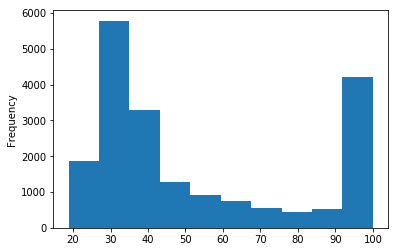

In [4]:
%matplotlib inline
node['pident'].plot(kind = 'hist')

In [5]:
node = node.groupby(by = 'sseqid').max(level = 'pident')

In [6]:
node.shape

(4092, 3)

In [7]:
node.head()

,qseqid,pident,evalue
sseqid,,,
511145.b0002,JMUY01000009_5|1438670.3,100.0,1.400000e-44
511145.b0003,JMUY01000009_6|1438670.3,99.4,2.400000e-181
511145.b0004,JMUY01000009_7|1438670.3,99.5,2.800000e-249
511145.b0005,FLWH01000009_163|562.12962,100.0,2.800000e-09
511145.b0006,JMUY01000009_9|1438670.3,98.8,1.000000e-145


In [8]:
selected_nodes = node.loc[node['pident']>= 70] # select high identity ones

In [9]:
selected_nodes.shape

(4079, 3)

In [10]:
edge_path = '/home/hermuba/data0118/cdhit/map_to_exist_net/511145.protein.links.v10.5.txt'

In [11]:
edge = pd.read_csv(edge_path, sep = ' ')

In [12]:
edge.head()

,protein1,protein2,combined_score
0,511145.b0001,511145.b0075,379
1,511145.b0001,511145.b2018,519
2,511145.b0001,511145.b0273,202
3,511145.b0001,511145.b2011,214
4,511145.b0001,511145.b3863,167


In [13]:
edge['prt1'] = edge['protein1'].map(selected_nodes['qseqid'])

In [14]:
edge['prt2'] = edge['protein2'].map(selected_nodes['qseqid'])

In [15]:
edge.head()

,protein1,protein2,combined_score,prt1,prt2
0,511145.b0001,511145.b0075,379,NaN,NaN
1,511145.b0001,511145.b2018,519,NaN,NaN
2,511145.b0001,511145.b0273,202,NaN,562.23090.con.0017_29|562.23090
3,511145.b0001,511145.b2011,214,NaN,562.23756.con.0091_9|562.23756
4,511145.b0001,511145.b3863,167,NaN,FLWH01000014_83|562.12962


In [16]:
edge_no_na = edge.dropna()

In [44]:
edge_no_na.shape

(1159522, 5)

In [45]:
edge_no_na.to_csv('/home/hermuba/data0118/goldstandard/refseq_90_string')

In [23]:
# merge with refseq90
refseq = '/home/hermuba/data0118/network1122/refseq_mu_high_90.csv'
refseq = pd.read_csv(refseq, sep = ',', header = 0)

In [39]:
refseq.head()

,mutual_info,nrm_mutual,gene_one,gene_two,goldstandard
0,0.074130,0.919936,562.22859.con.0026_36|562.22859,562.22697.con.0023_36|562.22697,NaN
1,0.079719,0.965408,562.22859.con.0026_36|562.22859,562.22477.con.0024_24|562.22477,NaN
2,0.142044,0.926829,562.22661.con.0008_31|562.22661,562.23589.con.0042_6|562.23589,NaN
3,0.012491,0.953753,562.23935.con.0006_1|562.23935,562.22874.con.0095_1|562.22874,NaN
4,0.102658,0.895509,562.22614.con.0044_2|562.22614,562.22614.con.0044_5|562.22614,NaN


In [48]:
refseq_string = refseq.merge(edge_no_na, left_on = ['gene_one', 'gene_two'], right_on = ['prt1', 'prt2'], how = 'outer')

In [46]:
refseq_string = refseq.merge(edge_no_na, left_on = ['gene_one', 'gene_two'], right_on = ['prt2', 'prt1'], how = 'outer')

In [49]:
refseq_string.head()

,mutual_info,nrm_mutual,gene_one,gene_two,goldstandard,protein1,protein2,combined_score,prt1,prt2
0,0.074130,0.919936,562.22859.con.0026_36|562.22859,562.22697.con.0023_36|562.22697,NaN,NaN,NaN,NaN,NaN,NaN
1,0.079719,0.965408,562.22859.con.0026_36|562.22859,562.22477.con.0024_24|562.22477,NaN,NaN,NaN,NaN,NaN,NaN
2,0.142044,0.926829,562.22661.con.0008_31|562.22661,562.23589.con.0042_6|562.23589,NaN,NaN,NaN,NaN,NaN,NaN
3,0.012491,0.953753,562.23935.con.0006_1|562.23935,562.22874.con.0095_1|562.22874,NaN,NaN,NaN,NaN,NaN,NaN
4,0.102658,0.895509,562.22614.con.0044_2|562.22614,562.22614.con.0044_5|562.22614,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
refseq_string.shape

(1169736, 10)

In [50]:
refseq_string['combined_score'].notnull().sum()
# very few of GO-based prediction of our network predicts PPI :-O

1159522

In [52]:
refseq_string['string'] = refseq_string['combined_score'].notnull()

In [60]:
refseq_string.loc[refseq_string.loc[refseq_string['goldstandard'] == 't'].index, 'GO'] = True

In [62]:
refseq_string['predicted'] = refseq_string['nrm_mutual'].notnull()

In [61]:
refseq_string.head()

,mutual_info,nrm_mutual,gene_one,gene_two,goldstandard,protein1,protein2,combined_score,prt1,prt2,string,GO
0,0.074130,0.919936,562.22859.con.0026_36|562.22859,562.22697.con.0023_36|562.22697,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
1,0.079719,0.965408,562.22859.con.0026_36|562.22859,562.22477.con.0024_24|562.22477,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
2,0.142044,0.926829,562.22661.con.0008_31|562.22661,562.23589.con.0042_6|562.23589,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
3,0.012491,0.953753,562.23935.con.0006_1|562.23935,562.22874.con.0095_1|562.22874,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
4,0.102658,0.895509,562.22614.con.0044_2|562.22614,562.22614.con.0044_5|562.22614,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN


In [64]:
selected = refseq_string[['gene_one', 'gene_two', 'GO', 'string','predicted']]